In [99]:
import pandas as pd
import numpy as np

Loading the Dataset

In [100]:
spam=pd.read_csv(r'/content/spam.csv',encoding='latin-1')

In [101]:
spam_df=pd.DataFrame(spam)

In [102]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [103]:
spam_df.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [104]:
spam_df.head()

,labels,messages,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [105]:
spam_df=spam_df.dropna(axis=1)
spam_df

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [106]:
spam_df.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

Labelling spam messages as 1 and not spam messages as 0

In [107]:

def labels():
  i=0
  while i<=5571:
      if spam_df['labels'][i]=='spam':
        spam_df['labels'][i]=1
      elif spam_df['labels'][i]=='ham':
        spam_df['labels'][i]=0
      i+=1
labels()
spam_df.labels.value_counts()

<ipython-input-107-3ec3db9d9092>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['labels'][i]=0
<ipython-input-107-3ec3db9d9092>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['labels'][i]=1


0    4825
1     747
Name: labels, dtype: int64

In [108]:
spam_df.duplicated().sum()

403

In [109]:
spam_df=spam_df.drop_duplicates(keep='first')
spam_df=spam_df.sort_values(by='labels',ascending=False,kind='heapsort')

In [110]:
spam_df=spam_df.reset_index()

In [111]:
spam_df.labels.value_counts()
# spam_df.reset_index()

for i in range(1100,5169):
  spam_df.drop(index=i,axis=0,inplace=True)

In [112]:

spam_df.drop(['index'],axis=1,inplace=True)


Getting insight of data through graphs

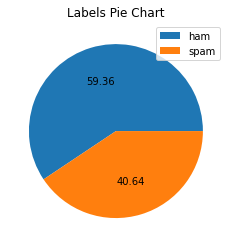

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie(spam_df['labels'].value_counts(),autopct='%0.2f')
plt.title("Labels Pie Chart")
plt.legend(labels=['ham','spam'])
plt.show()

In [114]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [115]:
spam_df['characters']=spam_df['messages'].apply(len)

In [116]:
spam_df['words']=spam_df['messages'].apply(lambda word:len(nltk.word_tokenize(word)))

In [117]:
spam_df['sentences']=spam_df['messages'].apply(lambda sen:len(nltk.sent_tokenize(sen)))

In [118]:
spam_df.labels.value_counts()

1    653
0    447
Name: labels, dtype: int64

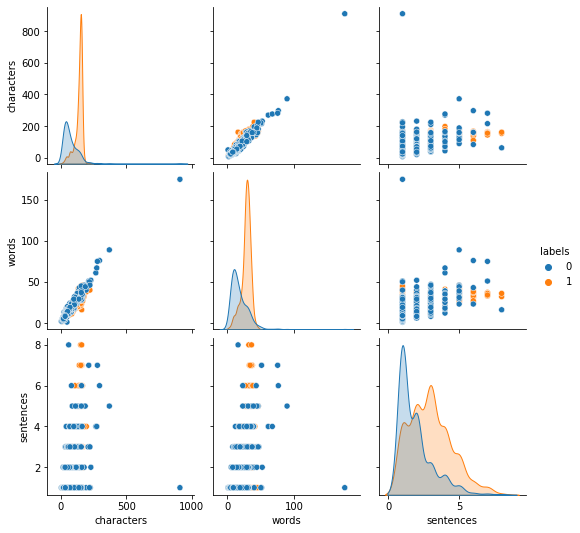

In [119]:
sns.pairplot(spam_df,hue='labels')

In [120]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

It is clear from the above plotted graphs that ham messages are much greater than spam messages therefore we are going to pick most used words from ham and spam messages


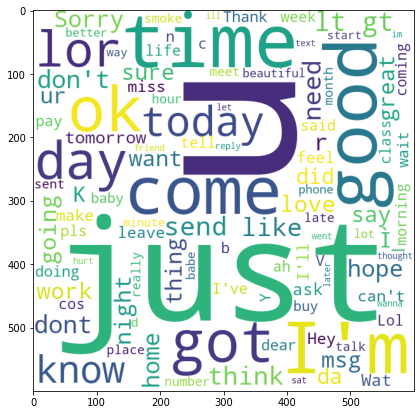

In [121]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as es
wc=WordCloud(height=600,width=600,min_font_size=14,background_color='white',stopwords=es)
ham_words=wc.generate(spam_df[spam_df['labels']==0]['messages'].str.cat(sep=' '))
plt.figure(figsize=(20,7))
plt.imshow(ham_words)

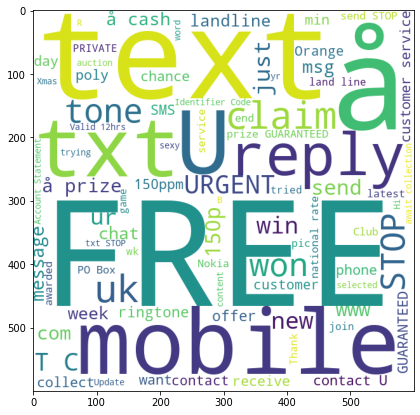

In [122]:
spam_words=wc.generate(spam_df[spam_df['labels']==1]['messages'].str.cat(sep=' '))
plt.figure(figsize=(20,7))
plt.imshow(spam_words)

Stemming and vectorization of sentences(words extracted)

In [123]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [124]:
spam_df['new']=spam_df['messages'].str.replace('[^\w\s]','')

<ipython-input-124-6a61da0d6bd4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  spam_df['new']=spam_df['messages'].str.replace('[^\w\s]','')


In [125]:

clean = [' '.join([ps.stem(word) for word in nltk.word_tokenize(message) if word not in es and ['i','me','myself','we','us']]) 
for message in spam_df['new'].values]


In [145]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2),max_features=2506,)
X=cv.fit_transform(clean)
count_vect_df = pd.DataFrame(X.todense(), columns=cv.get_feature_names_out())
spam_df=pd.concat([spam_df,count_vect_df],axis=1)

In [146]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Columns: 5008 entries, characters to û_
dtypes: int64(5008)
memory usage: 42.1 MB


In [128]:
y=np.array(spam_df['labels'])
spam_df=spam_df.drop(['messages','new','labels'],axis=1)


In [147]:
spam_df.head()

,characters,words,sentences,020603,07xxxxxxxxx,0800,0800 542,08000839402,08000930705,08000930705 deliveri,...,å5000 prize,å800,å800 prize,å900,å900 prize,ì_,ì_ wait,ì_ wan,ìï,û_
0,90,18,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,134,29,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,157,29,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,142,28,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,147,26,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train test splitting

In [148]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Model building and selecting best one

In [149]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=35,warm_start=True,verbose=2,n_jobs=-1)
model.fit(x_train,y=y_train.astype('int'))


building tree 1 of 35
building tree 2 of 35
building tree 3 of 35building tree 4 of 35

building tree 5 of 35building tree 6 of 35

building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35building tree 14 of 35

building tree 15 of 35
building tree 16 of 35building tree 17 of 35

building tree 18 of 35building tree 19 of 35

building tree 20 of 35building tree 21 of 35

building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35building tree 29 of 35

building tree 30 of 35building tree 31 of 35

building tree 32 of 35
building tree 33 of 35
building tree 34 of 35building tree 35 of 35



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


RandomForestClassifier(n_estimators=35, n_jobs=-1, verbose=2, warm_start=True)

In [132]:
def report(y_pred):  
  from sklearn.metrics import classification_report, accuracy_score
  print(classification_report(y_test.astype('int'),y_pred))
  print(accuracy_score(y_test.astype('int'),y_pred))

In [150]:
y_pred=model.predict(x_test)
report(y_pred)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        85
           1       0.98      0.93      0.96       135

    accuracy                           0.95       220
   macro avg       0.94      0.95      0.95       220
weighted avg       0.95      0.95      0.95       220

0.95


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:    0.0s finished


In [134]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=20,max_leaf_nodes=100)
model2=dc.fit(x_train,y_train.astype('int'))
y_pred2=model.predict(x_test)
report(y_pred2)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        85
           1       0.98      0.94      0.96       135

    accuracy                           0.95       220
   macro avg       0.94      0.95      0.95       220
weighted avg       0.95      0.95      0.95       220

0.95


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:    0.0s finished


In [156]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(warm_start=True,max_iter=200,n_jobs=-1,random_state=42)
model3=lr.fit(x_train,y_train.astype('int'))
y_pred3=model3.predict(x_test)
report(y_pred3)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        85
           1       0.98      0.95      0.97       135

    accuracy                           0.96       220
   macro avg       0.95      0.96      0.96       220
weighted avg       0.96      0.96      0.96       220

0.9590909090909091


In [136]:
from sklearn.naive_bayes import GaussianNB
mb=GaussianNB()
model4=mb.fit(x_train.toarray(),y_train.astype('int'))
y_pred4=model4.predict(x_test.toarray())
report(y_pred4)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        85
           1       0.95      0.97      0.96       135

    accuracy                           0.95       220
   macro avg       0.95      0.94      0.95       220
weighted avg       0.95      0.95      0.95       220

0.95


Logistic Regression is giving 95.9% accuracy.


In [158]:
def modelprediction(message):
  message=str(message)
  message=message.replace('[^\w\s]','')
  message=[message.lower()]
  message=cv.transform(message)
  prediction=model3.predict(message)
  print(prediction)
  if prediction==0:
    print('Message is not spam')
  elif prediction==1:
    print('Message is spam')


In [159]:
lis=map(list,input())
modelprediction(lis)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
[0]
Message is not spam
